각종 화장품, 비누 및 방향제 등을 소매하는 산업활동을 말한다.  

<예시>  
·향수 소매   
·샴푸 및 비누 소매  
·세정제 및 세제 소매  
·머리 염색약 소매  
·탈모제 소매  
·면도용 크림 소매  
·화장 도구 소매  
·치약 소매  
·무스 및 스프레이 소매  
·렌즈 클리너 소매  
·구강 세척제 소매  

In [1]:
# 한글문제 해결처리 
################################################################
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc
import platform
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# 경고문 숨기기
import warnings
warnings.filterwarnings(action='ignore')

def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [2]:
data = pd.read_csv("업종별/화장품 및 방향제 소매업.csv", encoding='utf-8', index_col=0,parse_dates=['REG_YYMM'])

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383713 entries, 0 to 383712
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   REG_YYMM      383713 non-null  object
 1   CARD_SIDO_NM  383713 non-null  object
 2   CARD_CCG_NM   383005 non-null  object
 3   STD_CLSS_NM   383713 non-null  object
 4   HOM_SIDO_NM   383713 non-null  object
 5   HOM_CCG_NM    381920 non-null  object
 6   AGE           383713 non-null  object
 7   SEX_CTGO_CD   383713 non-null  int64 
 8   FLC           383713 non-null  int64 
 9   CSTMR_CNT     383713 non-null  int64 
 10  AMT           383713 non-null  int64 
 11  CNT           383713 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 38.1+ MB
None


In [4]:
#안쓰는 컬럼 드랍, 정제
df=data.drop(['CARD_CCG_NM', 'HOM_CCG_NM', 'STD_CLSS_NM'], axis=1)
df = df.fillna('')
df['year'] = df['REG_YYMM'].apply(lambda x: grap_year(x))
df['month'] = df['REG_YYMM'].apply(lambda x: grap_month(x))

In [5]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383713 entries, 0 to 383712
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   REG_YYMM      383713 non-null  object
 1   CARD_SIDO_NM  383713 non-null  object
 2   HOM_SIDO_NM   383713 non-null  object
 3   AGE           383713 non-null  object
 4   SEX_CTGO_CD   383713 non-null  int64 
 5   FLC           383713 non-null  int64 
 6   CSTMR_CNT     383713 non-null  int64 
 7   AMT           383713 non-null  int64 
 8   CNT           383713 non-null  int64 
 9   year          383713 non-null  int64 
 10  month         383713 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 35.1+ MB
None
  REG_YYMM CARD_SIDO_NM HOM_SIDO_NM  AGE  SEX_CTGO_CD  FLC  CSTMR_CNT  \
0   201901           강원          강원  10s            1    1          3   
1   201901           강원          강원  10s            2    1         16   
2   201901           강원          강원  20s            1  

In [6]:
print(df.CARD_SIDO_NM.unique())
print(df.HOM_SIDO_NM.unique())

['강원' '경기' '경남' '경북' '광주' '대구' '대전' '부산' '서울' '세종' '울산' '인천' '전남' '전북'
 '제주' '충남' '충북']
['강원' '경기' '서울' '충북' '대전' '인천' '충남' '경북' '광주' '대구' '전북' '경남' '부산' '울산'
 '제주' '전남' '세종']


CARD_SIDO_NM
세종       889334029
제주      8519314181
강원      9059170809
충북      9175488855
울산      9189505127
전남     10072630541
대전     10438430972
전북     14678093101
광주     15844946227
경북     17885435363
인천     18835047481
충남     20009891502
경남     26364203530
대구     29702669913
부산     44905125134
경기     90234039685
서울    303576934373
Name: AMT, dtype: int64


Text(0.5, 1.0, '지역별 AMT')

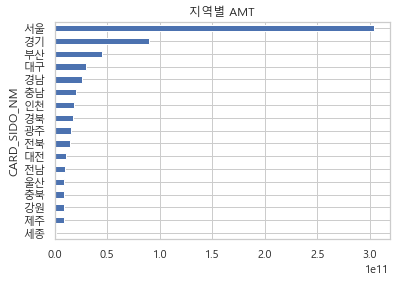

In [7]:
df1 = df.groupby('CARD_SIDO_NM')['AMT'].sum().sort_values()
print(df1)
df1.plot(kind="barh")
plt.title("지역별 AMT")

REG_YYMM
201901    49431741234
201902    42678743429
201903    48695291945
201904    46289777960
201905    48756280366
201906    45758001314
201907    43701126839
201908    42823670953
201909    40055857449
201910    42899184094
201911    42501121046
201912    40400412420
202001    39329126409
202002    35057136061
202003    31002789304
Name: AMT, dtype: int64


Text(0.5, 1.0, '기간별 AMT')

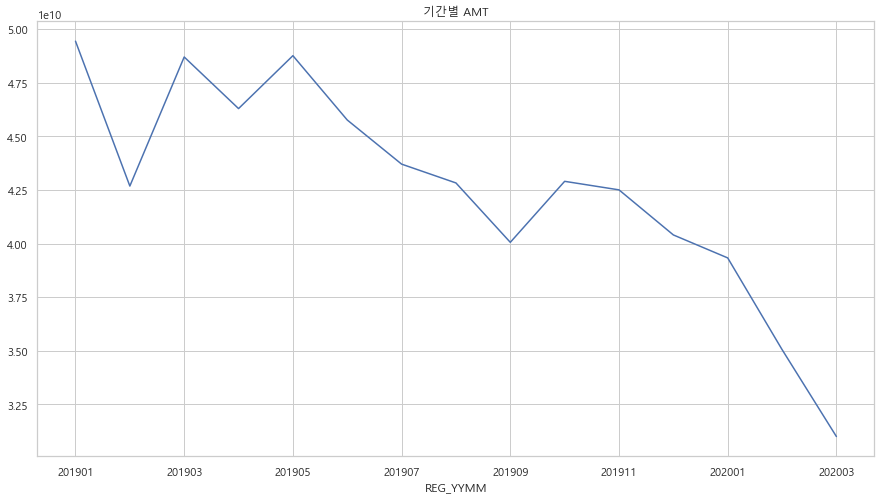

In [8]:
df2 = df.groupby('REG_YYMM')['AMT'].sum()
print(df2)
df2.plot(figsize=(15,8))
plt.title("기간별 AMT")

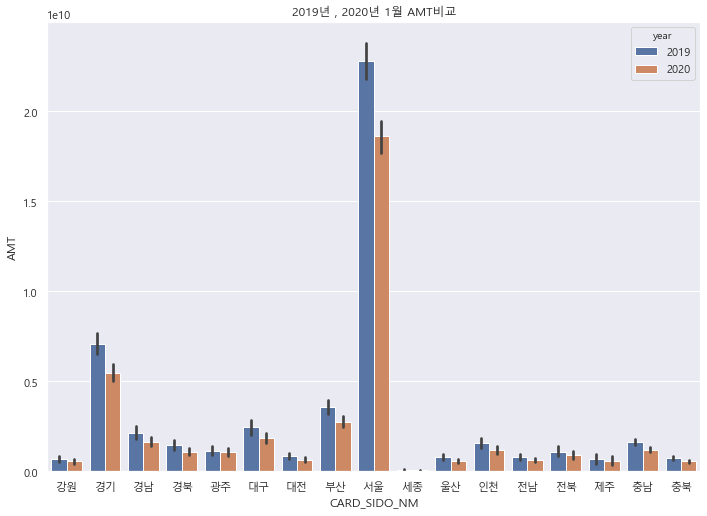

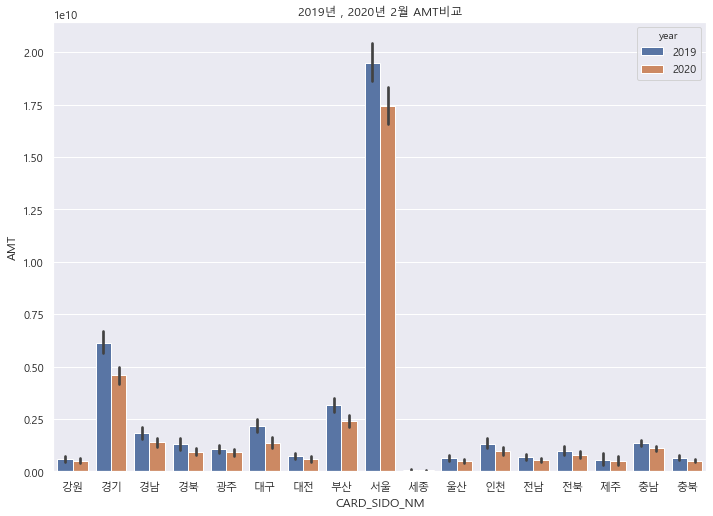

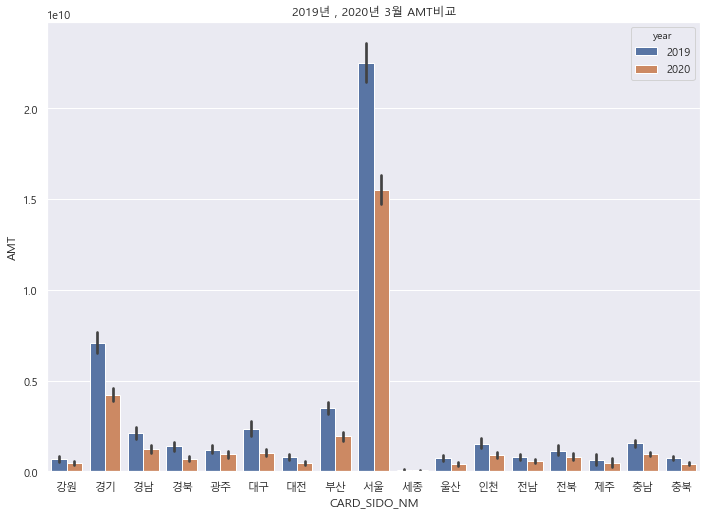

In [9]:
for i in range(1, 4):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    df_month = df[df.month == i]
    sns.barplot(data = df_month, x = 'CARD_SIDO_NM', y = 'AMT', hue = 'year',  estimator = sum)
    plt.title("2019년 , 2020년 %d월 AMT비교" %i)
    plt.show()

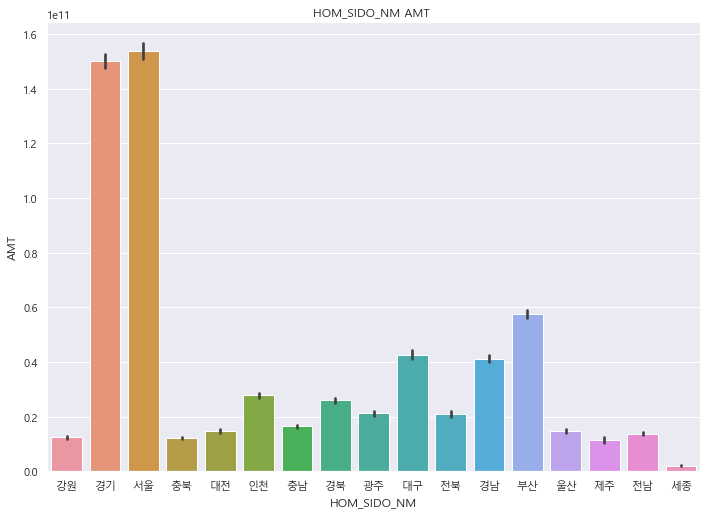

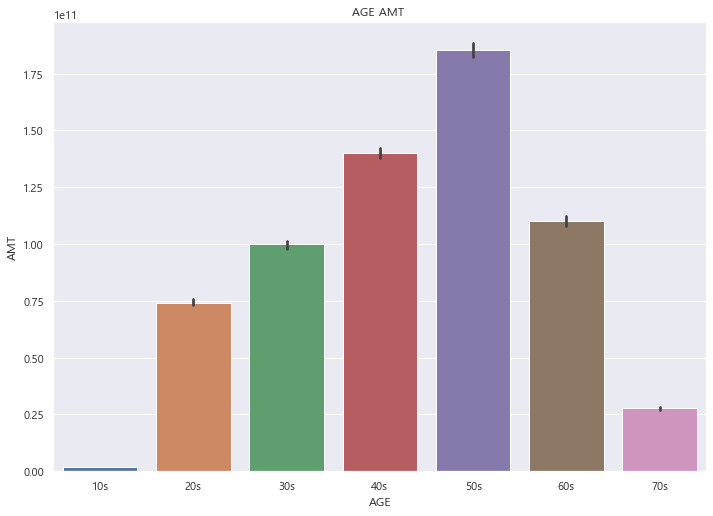

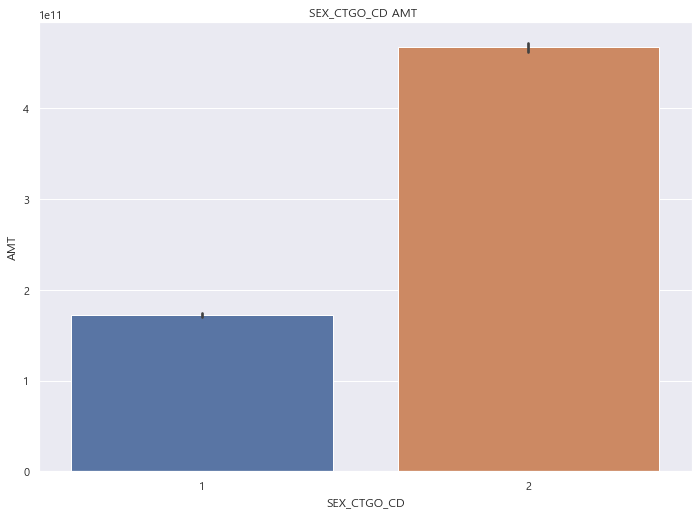

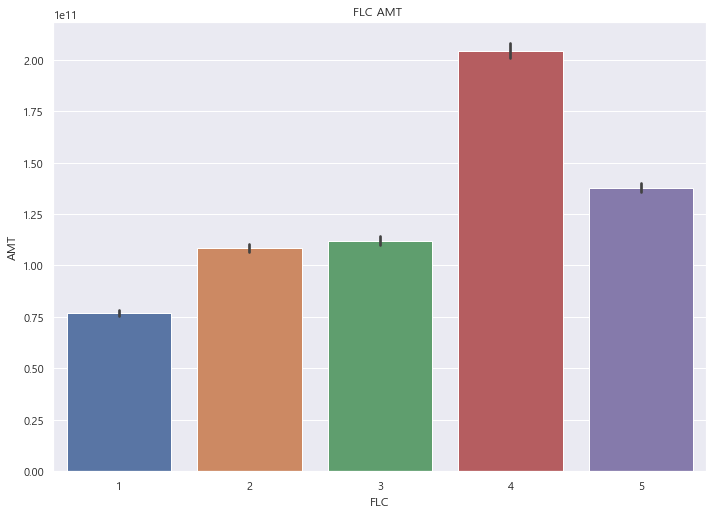

In [10]:
cols = ['HOM_SIDO_NM','AGE','SEX_CTGO_CD', 'FLC']
for val in cols:
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    sns.barplot(data = df, y = 'AMT', x = val, orient = 'v',estimator = sum)
    plt.title(val +' AMT ')
    plt.show()